<a href="https://colab.research.google.com/github/GabrielVillagran/NonLinearDataCodes/blob/splines/splinesRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework: linear, polynomial and splines regression on nonlinear data
Villagran Saucedo Gabriel Aldair 

Undergraduate, 2017 generation, 267572, 201702370947

Dr. Cuevas Tello Juan Carlos

Aprendizaje Automatico (Machine Learning) 

14/02/2022                                     

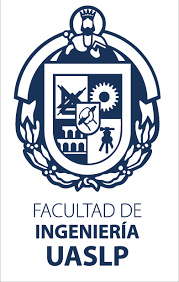

# Abstract
In this homework we are going to compare the different regressions using the nonlinear data, the regressions that were calculated was

- Polynomial
- Splines
- Linear

The code was developed in python using a jupyter notebook, the regressions are calculated for the first 100 levels, plotting the best one which was calculated based on the MSE.
# Introduction

The first regression that we are going to calculate is the linear regression for the first 100 levels of data. Remember that linear regression is a linear approach for modeling the relationship between a scalar response and one or more explanatory variables


Mounted at /content/drive/
DS-5-1-G-0-N-0_error_bars_0-106.eps    DS-5-1-GAP-1-1-N-1_v2.dat
DS-5-1-G-5-1-N-0_error_bars_0-466.eps  DS-5-1-GAP-5-1-N-3_v2.csv
DS-5-1-GAP-0-1-N-0_v2.csv	       DS-5-1-GAP-5-1-N-3_v2.dat
DS-5-1-GAP-0-1-N-0_v2.dat	       underlying_DS-5-1.jpg
DS-5-1-GAP-1-1-N-1_v2.csv


Text(0.5, 1.0, 'dataset: /content/drive/MyDrive/Colab Notebooks/MachineLearning/ArtificialData/')

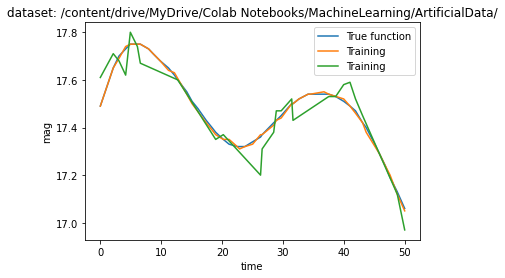

In [ ]:
#Loading data from Drive
from google.colab import  drive
drive.mount('/content/drive/')
!ls "/content/drive/MyDrive/Colab Notebooks/MachineLearning/ArtificialData"

import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/MachineLearning/ArtificialData/'
FILE1_csv = 'DS-5-1-GAP-0-1-N-0_v2.csv'
FILE2_csv = 'DS-5-1-GAP-1-1-N-1_v2.csv'
FILE3_csv= 'DS-5-1-GAP-5-1-N-3_v2.csv'
#Saving the FILE1 into d variable
d1 = pd.read_csv(DATA_PATH + FILE1_csv, header=None)
d2 = pd.read_csv(DATA_PATH + FILE2_csv, header=None)
d3 = pd.read_csv(DATA_PATH + FILE3_csv, header=None)
#plotting the datasets
plt.plot(d1[0], d1[1], label="True function")
plt.plot(d2[0], d2[1], label="Training")
plt.plot(d3[0], d3[1], label="Training")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("dataset: "+ DATA_PATH)

# Spline regression o Spline interpolation for noisy data 1
This are the last block of code, here I'm going to calculate the spline interpolation for the nonlinear data, remember that this interpolation is constructed of piecewise polynomials which pass through a set of control points

Here I am going to use 

**m.x = m.Param(value= 1, lb=0, ub=100)**

**lb is for Lower Bounds and ub is for Upper Bounds, which are the data that I am going to use**

In [ ]:
%pip install gekko

     |████████████████████████████████| 12.4 MB 6.9 MB/s 


In [ ]:
from gekko import GEKKO
# Importing the libraries that are necessaries
#Metrics
from sklearn.metrics import mean_squared_error
#Polynomial interpolation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import numpy as np
# Performing polynomial regression on 100 curves, i.e. 100 polynomial models.
#Loading the data
import pandas as pd
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/MachineLearning/ArtificialData/'
FILE_TRUE = 'DS-5-1-GAP-0-1-N-0_v2.csv'
FILE_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
FILE_NOISE2 = 'DS-5-1-GAP-5-1-N-3_v2.csv'
#creating an array to  save the MSE
trainPoly = [200]
testPoly = [200]
trainPoly2 = [200]
testPoly2 = [200]
#Reading True data
d_true = pd.read_csv(DATA_PATH + FILE_TRUE,header=None)
#Reading Noise1 data
d_noise1 = pd.read_csv(DATA_PATH + FILE_NOISE1,header=None)
#Reading Noise2 data
d_noise2 = pd.read_csv(DATA_PATH + FILE_NOISE2,header=None)

#Calculating regression for each column
for mod in range (1, 101):
  #DATA_PATH_NOISE1 = DS-5-1-GAP-1-1-N-1_v2.csv
  X = d_noise1[0]  #time
  x= X[:100, np.newaxis]
  Y = d_noise1[mod]  
  y = Y[:, np.newaxis]
  #Ground Truth data
  X_test = d_true[0]
  Y_test = d_true[1]

  m = GEKKO()
  m.x = m.Param(value= 1, lb=1, ub=101)
  m.y = m.Var()
  # x and y are the data
  m.cspline(m.x, m.y, x, y)
  m.options.IMODE=2
  m.solve(disp=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


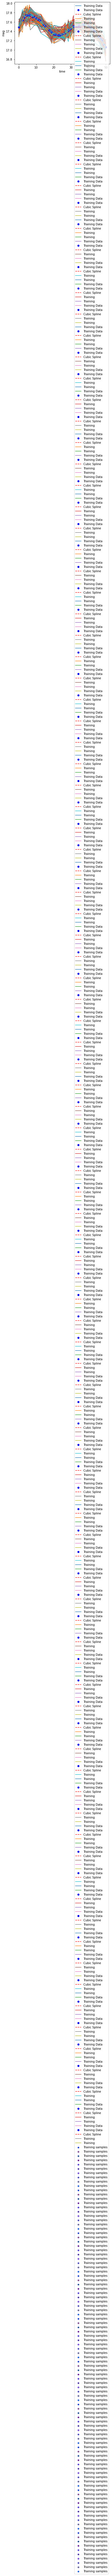

In [ ]:
for i in range (1, 101):
  #Plotting the spline regression for DS-5-1-GAP-1-1-N-1_v2.csv
  plt.plot(x, y, X, Y, 'bo', label='Training Data')
  plt.plot(m.x, m.y, 'r--', label='Cubic Spline')
  
  plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
  plt.plot(d_noise2[0], d_noise2[i], label="Training")
  plt.plot(d_noise1[0], d_noise1[i], label="Training")
  plt.plot(d_true[0], d_true[1])
  plt.xlabel("time")
  plt.ylabel("mag")
  plt.legend(loc="best")

Here Im using this function

**p.x = p.Param(value = np.linspace(-1,101))**

Which use values from -1 to 101 to generate the spline 

In [ ]:
#Calculating regression for each column
for mod in range (1, 101):
  #DATA_PATH_NOISE1 = DS-5-1-GAP-1-1-N-1_v2.csv
  X = d_noise1[0]  #time
  x= X[:100, np.newaxis]
  Y = d_noise1[mod]  
  y = Y[:, np.newaxis]
  #Ground Truth data
  X_test = d_true[0]
  Y_test = d_true[1]

  p = GEKKO()
  p.x = p.Param(value = np.linspace(1,101))
  p.y = p.Var()
  # x and y are the data
  p.cspline(p.x, p.y, x, y)
  p.options.IMODE=2
  p.solve(disp=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys


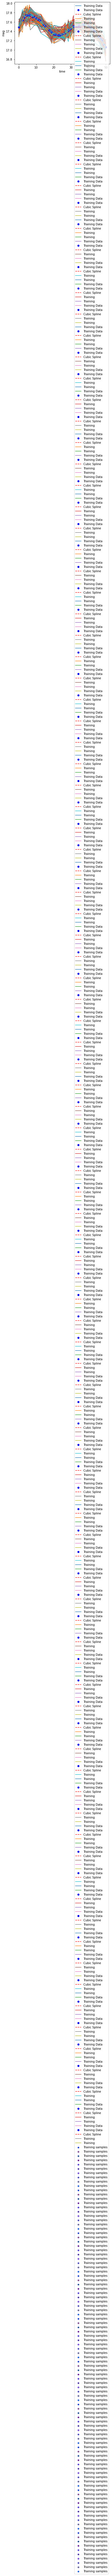

In [ ]:
for i in range (1, 101):
  #Plotting the spline regression for DS-5-1-GAP-1-1-N-1_v2.csv
  plt.plot(x, y, X, Y, 'bo', label='Training Data')
  plt.plot(m.x, m.y, 'r--', label='Cubic Spline')
  
  plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
  plt.plot(d_noise2[0], d_noise2[i], label="Training")
  plt.plot(d_noise1[0], d_noise1[i], label="Training")
  plt.plot(d_true[0], d_true[1])
  plt.xlabel("time")
  plt.ylabel("mag")
  plt.legend(loc="best")

In this last plot Im using the next function

**q.x = q.Param(value = 1)**

which gives just 1 value to the parameters of the spline which are the min and max values.

In [ ]:
#Calculating regression for each column
for mod in range (1, 101):
  #DATA_PATH_NOISE1 = DS-5-1-GAP-1-1-N-1_v2.csv
  X = d_noise1[0]  #time
  x= X[:100, np.newaxis]
  Y = d_noise1[mod]  
  y = Y[:, np.newaxis]
  #Ground Truth data
  X_test = d_true[0]
  Y_test = d_true[1]

  q = GEKKO()
  q.x = q.Param(value = 1)
  q.y = q.Var()
  # x and y are the data
  q.cspline(q.x, q.y, x, y)
  q.options.IMODE=2
  q.solve(disp=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys


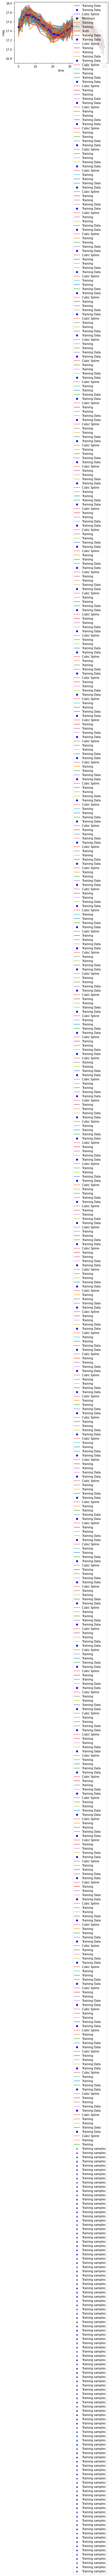

In [ ]:
#Plotting the spline regression for DS-5-1-GAP-1-1-N-1_v2.csv
plt.plot(X, Y, x, y, 'bo', label='Training Data')
plt.plot(q.x, q.y, 'b--', label='Cubic Spline')
plt.plot(q.x, q.y, 'ko', label='Minimum')
  
plt.scatter(X, y, edgecolor='b', s=10, label="Training samples")
plt.plot(d3[0], d3[i], label="Training")
plt.plot(d2[0], d2[i], label="Training")
plt.plot(d1[0], d1[1], label="Truth")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")

for i in range (1, 101):
  #Plotting the spline regression for DS-5-1-GAP-1-1-N-1_v2.csv
  plt.plot(x, y, X, Y, 'bo', label='Training Data')
  plt.plot(m.x, m.y, 'r--', label='Cubic Spline')
  
  plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
  plt.plot(d_noise2[0], d_noise2[i], label="Training")
  plt.plot(d_noise1[0], d_noise1[i], label="Training")
  plt.plot(d_true[0], d_true[1])
  plt.xlabel("time")
  plt.ylabel("mag")
  plt.legend(loc="best")

# Spline regression o Spline interpolation for noisy data 2
Here I am going to use 

**a.x = a.Param(value= 1, lb=0, ub=100)**

**lb is for Lower Bounds and ub is for Upper Bounds, which are the data that I am going to use**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


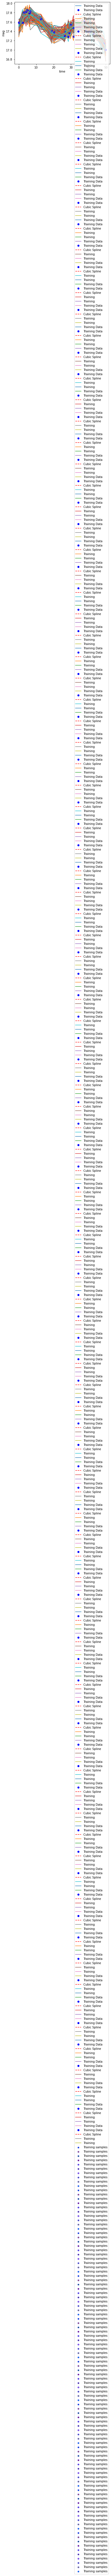

In [ ]:
from gekko import GEKKO
#creating an array to  save the MSE
trainPoly = [200]
testPoly = [200]
trainPoly2 = [200]
testPoly2 = [200]
#Reading True data
d_true2 = pd.read_csv(DATA_PATH + FILE_TRUE,header=None)
#Reading Noise1 data
d_noise11 = pd.read_csv(DATA_PATH + FILE_NOISE1,header=None)
#Reading Noise2 data
d_noise22 = pd.read_csv(DATA_PATH + FILE_NOISE2,header=None)

#Calculating regression for each column
for mod in range (1, 101):
  #DATA_PATH_NOISE2
  X = d_noise22[0]  #time
  x= X[:100, np.newaxis]
  Y = d_noise22[mod]  
  y = Y[:, np.newaxis]
  #Ground Truth data
  X_test = d_true2[0]
  Y_test = d_true2[1]

  a = GEKKO()
  a.x = a.Param(value= 1, lb=1, ub=101)
  a.y = a.Var()
  # x and y are the data
  a.cspline(a.x, a.y, x, y)
  a.options.IMODE=2
  a.solve(disp=False)

for i in range (1, 101):
  #Plotting the spline regression for DS-5-1-GAP-1-1-N-1_v2.csv
  plt.plot(x, y, X, Y, 'bo', label='Training Data')
  plt.plot(m.x, m.y, 'r--', label='Cubic Spline')
  
  plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
  plt.plot(d_noise22[0], d_noise22[i], label="Training")
  plt.plot(d_noise11[0], d_noise11[i], label="Training")
  plt.plot(d_true2[0], d_true2[1])
  plt.xlabel("time")
  plt.ylabel("mag")
  plt.legend(loc="best")

Here I'm using this function

**b.x = b.Param(value = np.linspace(-1,101))**

Which use values from -1 to 101 to generate the spline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing 

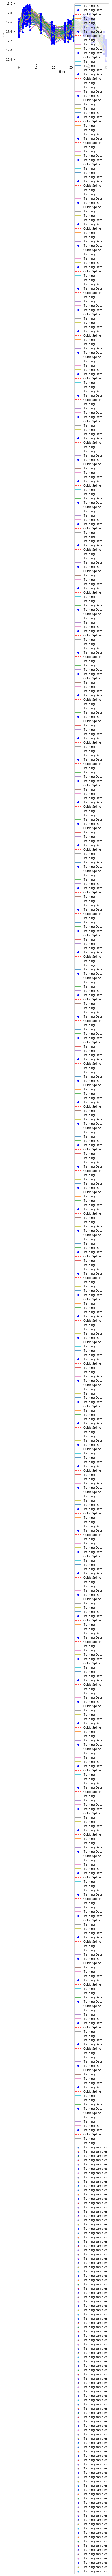

In [ ]:
#Calculating regression for each column
for mod in range (1, 101):
  #DATA_PATH_NOISE2
  X = d_noise22[0]  #time
  x= X[:100, np.newaxis]
  Y = d_noise22[mod]  
  y = Y[:, np.newaxis]
  #Ground Truth data
  X_test = d_true2[0]
  Y_test = d_true2[1]

  b = GEKKO()
  b.x = b.Param(value = np.linspace(1,101))
  b.y = b.Var()
  # x and y are the data
  b.cspline(b.x, b.y, x, y)
  b.options.IMODE=2
  b.solve(disp=False)
  #Plotting the spline regression for DS-5-1-GAP-1-1-N-1_v2.csv
  plt.plot(x, y, X, Y, 'bo', label='Training Data')
  plt.plot(m.x, m.y, 'r--', label='Cubic Spline')
  
  plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
  plt.plot(d_noise22[0], d_noise22[i], label="Training")
  plt.plot(d_noise11[0], d_noise11[i], label="Training")
  plt.plot(d_true2[0], d_true2[1])
  plt.xlabel("time")
  plt.ylabel("mag")
  plt.legend(loc="best")

In this last plot Im using the next function

**d.x = d.Param(value = 1)**

which gives just 1 value to the parameters of the spline which are the min and max values.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing 

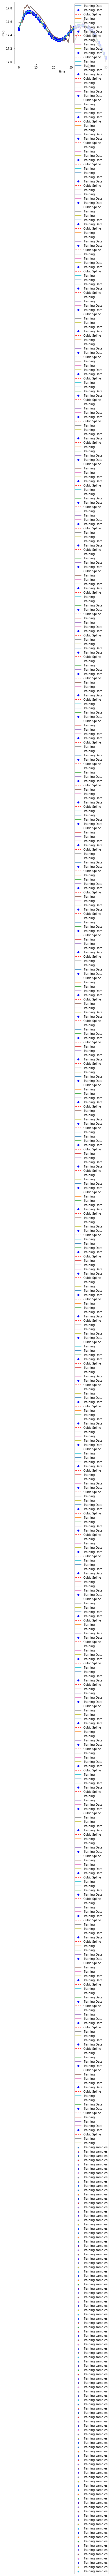

In [ ]:
#Calculating regression for each column
for mod in range (1, 101):
  #DATA_PATH_NOISE1 = DS-5-1-GAP-1-1-N-1_v2.csv
  X = d_noise11[0]  #time
  x= X[:100, np.newaxis]
  Y = d_noise11[mod]  
  y = Y[:, np.newaxis]
  #Ground Truth data
  X_test = d_true[0]
  Y_test = d_true[1]

  c = GEKKO()
  c.x = c.Param(value = 1)
  c.y = c.Var()
  # x and y are the data
  c.cspline(c.x, c.y, x, y)
  c.options.IMODE=2
  c.solve(disp=False)

  #Plotting the spline regression for DS-5-1-GAP-1-1-N-1_v2.csv
  plt.plot(x, y, X, Y, 'bo', label='Training Data')
  plt.plot(m.x, m.y, 'r--', label='Cubic Spline')
  
  plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
  plt.plot(d_noise22[0], d_noise22[i], label="Training")
  plt.plot(d_noise11[0], d_noise11[i], label="Training")
  plt.plot(d_true2[0], d_true2[1])
  plt.xlabel("time")
  plt.ylabel("mag")
  plt.legend(loc="best")

# Conclusions 
This was an interesting and challenging work, I had to research how to calculate spline regression and how to plot it, I'm going to write a conclusion for each model, because it is important to explain how each one works and what I did.

- Linear Regression

For this regression I Uploaded the data and calculated the 100 realizations using 2 for the polynomial degree, I used this number because is the degree of a linear equation

- Polynomial Regression

In this one I use the same code as the linear regression, but the main difference is that I tried to find the best degree for the 100 realizations, the degree that had the best fitting was 9

**I calculate the MSE for the polynomial and linear regressions** 

- Spline Regression

This was the most interesting regression from the three, I had to look at the three different ways to calculate the spline regression and I thought that the best was to plot the three different ways to calculate it. I'm going to explain in more detail what I did.
- **a.x = a.Param(value= 1, lb=0, ub=100)**: What I'm defining here is that the function has to calculate the minimum value and the maximum value using the data from case 1 to case 100

-  **b.x = b.Param(value = np.linspace(-1,101))**: This function is calculating the spaces between the 100 data that I calculated before

- **d.x = d.Param(value = 1)**: In this last one the function is calculating the minimum value and the maximum value ignoring the other knots of the plot.

# References
https://www.youtube.com/watch?v=lZEI36_Bsv4&t=100s&ab_channel=APMonitor.com

http://apmonitor.com/wiki/index.php/Main/GekkoPythonOptimization 